In [2]:
# Setup

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Bangkit/Dataset/newAllDataset.csv', header=0, index_col=0, parse_dates=True)
series_harga = df['Bayam']
df

,Bayam,Kangkung,Sawi,Brokoli,Kubis,Wortel,Kentang,Kacang Polong,Kacang Tanah,Buncis,...,Lada,Cengkeh,Kayu Manis,Kapulaga,Kunyit,Ubi Jalar,Ubi Kayu,Kentang.1,Singkong,Talas
Tanggal,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1500,1000,5500,9000,3500,8000,6000,30000,26000,17000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-08-01,1500,1000,5500,9000,3500,8000,6000,30000,26000,17000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-01-15,1500,1000,5500,9000,3500,8000,6000,30000,26000,16000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-01-22,1500,1000,5500,9000,3500,8000,6000,30000,26000,16000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
2013-01-29,1500,1000,5500,9000,3500,8000,6000,30000,26000,16000,...,89000,130000,17000,83000,3500,3000,4000,2000,1000,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,11500,11000,7000,38000,13500,13000,18000,57000,27500,35000,...,125500,180000,23000,82000,9500,9000,5500,5000,2000,22000
2023-07-07,12000,11500,6000,38000,15000,18000,18000,57000,28000,35000,...,125500,180000,23000,82000,9500,9000,5500,5000,2000,22000
2023-07-14,12000,11500,6000,38000,15000,18000,18000,57000,28000,35000,...,125500,180000,23000,82000,9500,9000,5500,5000,2000,22000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2013-01-01 to 2023-07-28
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bayam                 553 non-null    int64  
 1   Kangkung              553 non-null    int64  
 2   Sawi                  553 non-null    int64  
 3   Brokoli               553 non-null    int64  
 4   Kubis                 553 non-null    int64  
 5   Wortel                553 non-null    int64  
 6   Kentang               553 non-null    int64  
 7   Kacang Polong         553 non-null    int64  
 8   Kacang Tanah          553 non-null    int64  
 9   Buncis                553 non-null    int64  
 10  Labu Siam             553 non-null    int64  
 11  Labu Kuning           553 non-null    int64  
 12  Lobak Merah           553 non-null    int64  
 13  Lobak Putih           553 non-null    int64  
 14  Tomat                 553 non-null    int64  
 15  Tero

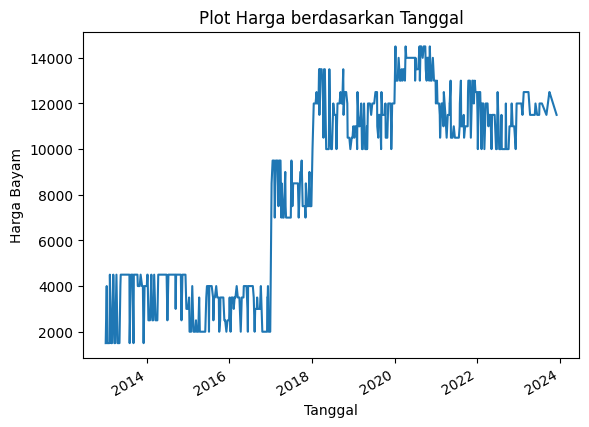

In [7]:
plt.title('Plot Harga berdasarkan Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Harga Bayam')
series_harga.plot();

In [8]:
# Fungsi untuk Membentuk Data untuk Model
def df_to_X_y(df, window_size=75):
    df_as_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
# Normalisasi Data
mean_value = series_harga.mean()
std_value = series_harga.std()
normalized_series = (series_harga - mean_value) / std_value
#deret waktu rata rata 0 standar deviasi 1
#nilai seragam dan lebih kecil

In [10]:
WINDOW_SIZE = 5
X, y = df_to_X_y(normalized_series, WINDOW_SIZE)
X.shape, y.shape

((548, 5, 1), (548,))

In [11]:
# Pembagian Data menjadi Train, Validation, dan Test sets
X_train, y_train = X[:500], y[:500]
X_val, y_val = X[500:520], y[500:520]
X_test, y_test = X[520:], y[520:]

# Inisialisasi scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalisasi X_train
X_train = scaler.fit_transform(X_train.reshape(-1, WINDOW_SIZE))

# Normalisasi X_val
X_val = scaler.transform(X_val.reshape(-1, WINDOW_SIZE))

# Normalisasi X_test
X_test = scaler.transform(X_test.reshape(-1, WINDOW_SIZE))

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((500, 5), (500,), (20, 5), (20,), (28, 5), (28,))

In [12]:
# Arsitektur Model LSTM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.LSTM(64, return_sequences='True'),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29585 (115.57 KB)
Trainable params: 29585 (115.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Kompilasi dan Pelatihan Model dengan Normalisasi
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          epochs=1000,  # Sesuaikan jumlah epoch sesuai kebutuhan
          callbacks=[checkpoint])

Epoch 1/1000
16/16 [==============================] - 14s 623ms/step - loss: 0.9684 - root_mean_squared_error: 0.9841 - val_loss: 0.3900 - val_root_mean_squared_error: 0.6245
Epoch 2/1000
16/16 [==============================] - 7s 434ms/step - loss: 0.9426 - root_mean_squared_error: 0.9709 - val_loss: 0.3541 - val_root_mean_squared_error: 0.5951
Epoch 3/1000
16/16 [==============================] - 9s 568ms/step - loss: 0.9120 - root_mean_squared_error: 0.9550 - val_loss: 0.3173 - val_root_mean_squared_error: 0.5633
Epoch 4/1000
16/16 [==============================] - 6s 421ms/step - loss: 0.8759 - root_mean_squared_error: 0.9359 - val_loss: 0.2777 - val_root_mean_squared_error: 0.5270
Epoch 5/1000
16/16 [==============================] - 8s 564ms/step - loss: 0.8374 - root_mean_squared_error: 0.9151 - val_loss: 0.2393 - val_root_mean_squared_error: 0.4892
Epoch 6/1000
16/16 [==============================] - 6s 425ms/step - loss: 0.7969 - root_mean_squared_error: 0.8927 - val_loss: 

In [14]:
# Pemuatan Model Terbaik
model = tf.keras.models.load_model('model/')

## Visualisasi Data Train

16/16 [==============================] - 0s 3ms/step


<Axes: title={'center': 'Training Set Predictions vs Actuals'}>

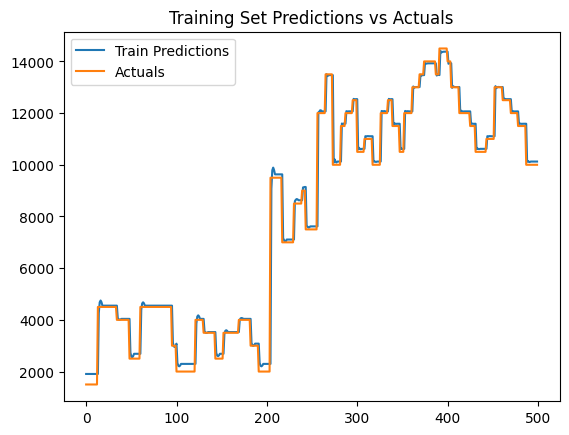

In [20]:
# Visualisasi Hasil Pelatihan pada Data Training
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions * std_value + mean_value, 'Actuals': y_train * std_value + mean_value})
train_results.plot(title='Training Set Predictions vs Actuals')

In [23]:
train_results

,Train Predictions,Actuals
0,1906.630371,1500.0
1,1906.630371,1500.0
2,1906.630371,1500.0
3,1906.630371,1500.0
4,1906.630371,1500.0
...,...,...
495,10125.016602,10000.0
496,10125.016602,10000.0
497,10125.016602,10000.0
498,10125.016602,10000.0


1/1 [==============================] - 0s 21ms/step


<Axes: title={'center': 'Validation Set Predictions vs Actuals'}>

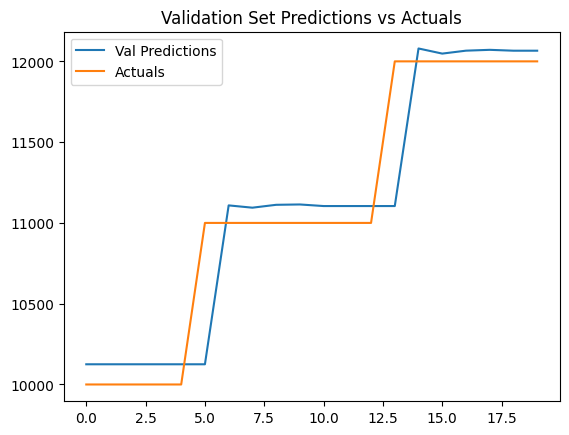

In [16]:
# Visualisasi Hasil Pelatihan pada Data Validasi
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions * std_value + mean_value, 'Actuals': y_val * std_value + mean_value})
val_results.plot(title='Validation Set Predictions vs Actuals')

In [22]:
val_results

,Val Predictions,Actuals
0,10125.016602,10000.0
1,10125.016602,10000.0
2,10125.016602,10000.0
3,10125.016602,10000.0
4,10125.016602,10000.0
5,10125.016602,11000.0
6,11108.496094,11000.0
7,11094.298828,11000.0
8,11112.099609,11000.0
9,11114.229492,11000.0


1/1 [==============================] - 0s 35ms/step


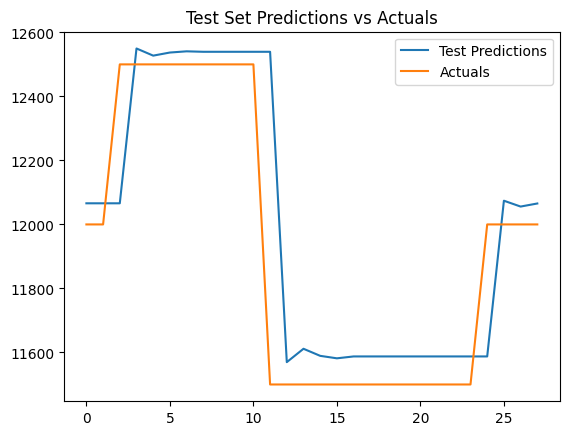

In [24]:
# Visualisasi Hasil Prediksi pada Data Test
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions * std_value + mean_value, 'Actuals': y_test * std_value + mean_value})
test_results.plot(title='Test Set Predictions vs Actuals')
plt.show()

In [25]:
test_results

,Test Predictions,Actuals
0,12065.999023,12000.0
1,12065.999023,12000.0
2,12065.999023,12500.0
3,12549.682617,12500.0
4,12527.325195,12500.0
5,12537.019531,12500.0
6,12540.790039,12500.0
7,12539.332031,12500.0
8,12539.332031,12500.0
9,12539.332031,12500.0


In [28]:
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

1/1 [==============================] - 0s 34ms/step


((500, 1), (28, 1))

 # Model Evaluation

In [35]:
# Evaluation metrices RMSE and MAE
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  0.13429992603828217
Train data MSE:  0.01803647013388806
Train data MAE:  0.05260400254216573
-------------------------------------------------------------------------------------
Test data RMSE:  0.05648628591253717
Test data MSE:  0.003190700496192895
Test data MAE:  0.03052524479002605


- # Predicting next 7 days

In [61]:
# # Fungsi untuk memprediksi harga bayam 1 minggu ke depan
# def predict_future_prices(model, initial_sequence, steps=7):
#     future_prices = []

#     # Gunakan model untuk memprediksi harga bayam setiap hari
#     current_sequence = initial_sequence
#     for i in range(steps):
#         # Lakukan prediksi untuk hari berikutnya
#         next_price = model.predict(np.reshape(current_sequence, (1, WINDOW_SIZE, 1)))
#         future_prices.append(next_price[0, 0])

#         # Perbarui urutan dengan harga yang diprediksi
#         current_sequence = np.append(current_sequence[1:], next_price[0])

#     return future_prices

# # Inisialisasi urutan awal untuk prediksi
# initial_sequence = X_test[-WINDOW_SIZE:].flatten()

# # Lakukan prediksi harga bayam 1 minggu ke depan
# predicted_future_prices = predict_future_prices(model, initial_sequence, steps=7)

# # Invers transform untuk mendapatkan nilai sebenarnya
# predicted_future_prices_actual = scaler.inverse_transform(np.reshape(predicted_future_prices, (len(predicted_future_prices), 1)))

# # Plot harga bayam sebelumnya yang di train, test, dan val
# plt.figure(figsize=(12, 6))
# plt.plot(train_results['Actuals'], label='Train Bayam', color='blue')
# plt.plot(val_results['Actuals'], label='Val Bayam', color='green')
# plt.plot(test_results['Actuals'], label='Test Bayam', color='orange')

# # Plot prediksi harga bayam 1 minggu ke depan
# future_days = np.arange(1, 8)
# plt.plot(future_days, predicted_future_prices_actual, label='Predicted Future Prices', color='red', linestyle='--')

# plt.title('Harga Bayam - Train, Val, Test, dan Prediksi 1 Minggu ke Depan')
# plt.xlabel('Hari')
# plt.ylabel('Harga Bayam')
# plt.legend()
# plt.show()

ValueError: ignored

In [64]:
# import matplotlib.pyplot as plt

# # Fungsi untuk memprediksi harga di hari selanjutnya
# def predict_next_day(model, last_window):
#     # Lakukan prediksi untuk 1 hari ke depan
#     next_day_pred = model.predict(np.array([last_window]))
#     return next_day_pred[0, 0]

# # Mengambil window terakhir dari data latih untuk digunakan sebagai awal prediksi
# last_window_train = X_train[-1]

# # Jumlah hari yang ingin diprediksi ke depan
# days_to_predict = 7

# # List untuk menyimpan prediksi harian
# predicted_prices = []

# for day in range(days_to_predict):
#     # Lakukan prediksi harga di hari selanjutnya
#     next_day_pred = predict_next_day(model, last_window_train)

#     # Tambahkan prediksi ke dalam list
#     predicted_prices.append(next_day_pred)

#     # Update last_window_train dengan menambahkan prediksi ke belakang
#     last_window_train = np.roll(last_window_train, -1)
#     last_window_train[-1] = next_day_pred

# # Ubah menjadi array dengan bentuk (7, 5)
# predicted_prices_array = np.array([predicted_prices])

# # Invers transform untuk mendapatkan nilai sebenarnya
# predicted_prices_actual = scaler.inverse_transform(predicted_prices_array.reshape(-1, len(predicted_prices_array[0])))


# # Plotting data
# plt.figure(figsize=(10, 6))

# # Plot harga bayam sebelumnya
# plt.plot(series_harga.index[-len(X_train):], scaler.inverse_transform(X_train.reshape(-1, 1)), label='Harga Bayam Sebelumnya')

# # Plot data latih
# plt.plot(series_harga.index[-len(X_train):], scaler.inverse_transform(y_train.reshape(-1, 1)), label='Data Latih (Training)')

# # Plot prediksi harga untuk 7 hari ke depan
# plt.plot(pd.date_range(start=series_harga.index[-1] + pd.Timedelta(days=1), periods=days_to_predict, freq='D'), predicted_prices_actual, label='Prediksi Harga')

# plt.title('Prediksi Harga Bayam untuk 7 Hari ke Depan')
# plt.xlabel('Tanggal')
# plt.ylabel('Harga (Rupiah)')
# plt.legend()
# plt.show()


1/1 [==============================] - 0s 29ms/step


ValueError: ignored

# Save the model

In [66]:
# Save your model in the SavedModel format
model.save("modelV1.h5")